In [1]:
from library.ron_utils import iou_2d, DetectedObject
from ELAN_label_trackID import tracking_obj_by_labels
from ELAN_video_train import get_object_label, id_compare
'''
def iou_2d(box1, box2):
    box1 = box1.flatten()
    box2 = box2.flatten()
    area1 = (box1[2]-box1[0])*(box1[3]-box1[1])
    area2 = (box2[2]-box2[0])*(box2[3]-box2[1])
    area_sum = abs(area1) + abs(area2)
    
    #計算重疊方形座標
    x1 = max(box1[0], box2[0]) # left
    y1 = max(box1[1], box2[1]) # top
    x2 = min(box1[2], box2[2]) # right
    y2 = min(box1[3], box2[3]) # btm

    if x1 >= x2 or y1 >= y2:
        return 0
    else:
        inter_area = abs((x2-x1)*(y2-y1))
    return inter_area/(area_sum-inter_area)

class DetectedObject(object):
    def __init__(self, line):
        self.line = line
        self.class_ = None
        self.box2d = None
        self.dims = None
        self.locs = None
        self.rys = None
        self.id = None
        self.frames = list()
        self.crops = list()
        self.lines = list()
        self.set_info(line)
        
    def set_info(self, line):
        self.lines.append(line)
        elements = line.split()
        for j in range(1, len(elements)):
            elements[j] = float(elements[j])
        top_left = [int(round(elements[4])), int(round(elements[5]))]
        btm_right = [int(round(elements[6])), int(round(elements[7]))]
        self.box2d = np.array([top_left, btm_right])
        self.class_ = elements[0]
        self.alphas = [elements[3]]
        self.dims = [[elements[8], elements[9], elements[10]]]
        self.locs = [[elements[11], elements[12], elements[13]]]
        self.rys = [elements[14]]
        if len(elements) == 16:
            self.id = int(elements[15])
    
    def update_info(self, obj):
        self.box2d = obj.box2d
        self.alphas += obj.alphas
        self.dims += obj.dims
        self.locs += obj.locs
        self.rys += obj.rys
        self.lines.append(obj.line)
        
    def record_frames(self, frame_id):
        self.frames.append(frame_id)
        
def tracking_obj_by_labels(labels, images, WRITE_FILE=False, folder='renew_label', new_folder='renew_label_obj'):
    tracking_dict = dict()
    for idx in range(len(labels)):
        lines = [x.strip() for x in open(labels[idx]).readlines()]
        new_lines = [line for line in lines]
        img = cv2.cvtColor(cv2.imread(images[idx]), cv2.COLOR_BGR2RGB)
        objects = [DetectedObject(line) for line in lines]
        for obj_idx, obj in enumerate(objects):
            # first frame
            top_left, btm_right = obj.box2d
            crop = img[top_left[1]:btm_right[1]+1, top_left[0]:btm_right[0]+1]
            if len(tracking_dict.keys()) == 0:
                tracking_dict[obj_idx] = obj
                tracking_dict[obj_idx].record_frames(idx)
                tracking_dict[obj_idx].crops.append(crop)
                new_lines[obj_idx] += f' {obj_idx}'
            else:
                now_box2d = obj.box2d
                match = False
                for key in tracking_dict.keys():
                    last_box2d = tracking_dict[key].box2d
                    iou_value = iou_2d(now_box2d, last_box2d)
                    last_frame = tracking_dict[key].frames[-1]
                    if iou_value > 0.6 and idx - last_frame < 5:
                        #print(f'MATCHED:{iou_value:.2f}')
                        match = True
                        tracking_dict[key].update_info(obj)
                        tracking_dict[key].record_frames(idx)
                        tracking_dict[key].crops.append(crop)
                        new_lines[obj_idx] += f' {key}'
                        break
                if not match: #new obj
                    new_id = len(tracking_dict.keys())
                    tracking_dict[new_id] = obj
                    tracking_dict[new_id].record_frames(idx)
                    #tracking_dict[new_id].crops.append(crop)
                    new_lines[obj_idx] += f' {new_id}'
        if WRITE_FILE:
            with open(labels[idx].replace(folder, new_folder), 'w') as f:
                for line in new_lines:
                    f.writelines(line + '\n')
        if idx%500 == 0:
            print(idx)
    return tracking_dict

def get_object_label(objects, bin_num=4):
    ELAN_averages = ClassAverages(average_file='renew_ELAN_class_averages.txt')
    label = dict()
    Heading_class = list()
    Residual = list()
    Dim_delta = list()
    TrackID = list()
    for obj in objects:
        heading_class, residual = angle2class(obj.alphas[0], bin_num)
        dim_delta = np.array(obj.dims[0]) - ELAN_averages.get_item(obj.class_)
        obj_id = obj.id
        Heading_class.append(heading_class)
        Residual.append(residual)
        Dim_delta.append(dim_delta)
        TrackID.append(obj_id)
    label['bin'] = torch.tensor(Heading_class)
    label['residual'] = torch.tensor(Residual)
    label['dim_delta'] = torch.tensor(np.array(Dim_delta))
    label['track_id'] = TrackID
    return label

def id_compare(now_id, last_id):
    now_id_list = list()
    last_id_list = list()
    for idx, id_ in enumerate(now_id):
        try:
            find_idx = last_id.index(id_)
        except:
            find_idx = -1

        if find_idx != -1:
            now_id_list.append(idx)
            last_id_list.append(find_idx)
    return now_id_list, last_id_list
'''

"\ndef iou_2d(box1, box2):\n    box1 = box1.flatten()\n    box2 = box2.flatten()\n    area1 = (box1[2]-box1[0])*(box1[3]-box1[1])\n    area2 = (box2[2]-box2[0])*(box2[3]-box2[1])\n    area_sum = abs(area1) + abs(area2)\n    \n    #計算重疊方形座標\n    x1 = max(box1[0], box2[0]) # left\n    y1 = max(box1[1], box2[1]) # top\n    x2 = min(box1[2], box2[2]) # right\n    y2 = min(box1[3], box2[3]) # btm\n\n    if x1 >= x2 or y1 >= y2:\n        return 0\n    else:\n        inter_area = abs((x2-x1)*(y2-y1))\n    return inter_area/(area_sum-inter_area)\n\nclass DetectedObject(object):\n    def __init__(self, line):\n        self.line = line\n        self.class_ = None\n        self.box2d = None\n        self.dims = None\n        self.locs = None\n        self.rys = None\n        self.id = None\n        self.frames = list()\n        self.crops = list()\n        self.lines = list()\n        self.set_info(line)\n        \n    def set_info(self, line):\n        self.lines.append(line)\n        elements =

In [85]:
import glob
import numpy as np
import cv2
import os
'''
cam_to_img = np.array([
        [ 1.418667e+03, 0.000000e+00, 6.4e+02,0],
        [ 0.000000e+00, 1.418667e+03, 3.6e+02,0],
        [ 0.000000e+00, 0.000000e+00, 1.000000e+00,0]])
'''
#1532~1632 tracking
#40-60 tracking
images = glob.glob('Elan_3d_box/image_2/*.png')
renew_labels = glob.glob('Elan_3d_box/renew_label/*.txt')

trainset = [x.strip() for x in open('Elan_3d_box/ImageSets/train.txt').readlines()]
print(len(trainset))
# train 0-1605.txt
# val 1606-txt
os.makedirs('Elan_3d_box/renew_label_obj', exist_ok=True)
tracking_dict = tracking_obj_by_labels(renew_labels, WRITE_FILE=False)


1591


### 0719 DOING frame consistency

## ELAN Evaluation metrics (Dim delta, depth, alpha, Dim consistency)

In [2]:
from library.ron_utils import *
import matplotlib.pyplot as plt

def ELAN_eval_metrics(result_root):
    valset = [x.strip() for x in open('Elan_3d_box/ImageSets/val.txt').readlines()]
    dim_GT = list()
    dim_ELAN = list()
    depth_GT = list()
    depth_ELAN = list()
    alpha_GT = list()
    alpha_ELAN = list()

    for id_ in valset:
        gt_lines = [x.strip() for x in open(f'Elan_3d_box/renew_label/{id_}.txt').readlines()]
        gt_objects = [DetectedObject(line) for line in gt_lines if line.split()[0]=='Car']
        for obj in gt_objects:
            dim_GT.append(obj.dims[0])
            depth_GT.append(obj.locs[0][2])
            alpha_GT.append(obj.alphas[0])
            
        pred_lines = [x.strip() for x in open(f'{result_root}/{id_}.txt').readlines()]
        pred_objects = [DetectedObject(line) for line in pred_lines if line.split()[0]=='Car']
        for obj in pred_objects:
            dim_ELAN.append(obj.dims[0])
            depth_ELAN.append(obj.locs[0][2])
            alpha_ELAN.append(obj.alphas[0])

    dim_GT = np.array(dim_GT)
    dim_ELAN = np.array(dim_ELAN)
    depth_GT = np.array(depth_GT)
    depth_ELAN = np.array(depth_ELAN)
    alpha_GT = np.array(alpha_GT)
    alpha_ELAN = np.array(alpha_ELAN)

    depth_diff = depth_GT-depth_ELAN
    alpha_diff = np.cos(alpha_GT - alpha_ELAN)
    dim_diff = np.mean(abs(dim_GT-dim_ELAN), axis=0)
    print(f'[DIM diff] H:{dim_diff[0]:.4f}, W:{dim_diff[1]:.4f}, L:{dim_diff[2]:.4f}')
    
    print(f'[Alpha diff] abs_mean: {alpha_diff.mean():.4f}')
    plt.hist(alpha_diff)
    plt.show()
    print(f'[Depth diff] abs_mean: {abs(depth_diff).mean():.4f}')
    print('[Depth error]')
    box_depth_error_calculation(depth_GT, depth_ELAN, 5)

[DIM diff] H:0.1903, W:0.1478, L:0.5493
[Alpha diff] abs_mean: 0.7549


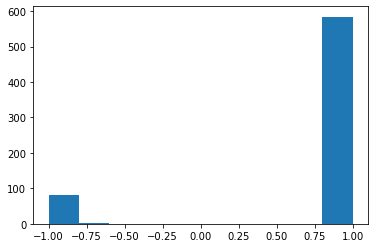

[Depth diff] abs_mean: 4.6484
[Depth error]
num of Car: 665
	num of depth 0-10: 0 
	num of depth 10-20: 68   abs_delta mean:2.900m, Out of 5m: 11
	num of depth 20-30: 142   abs_delta mean:3.744m, Out of 5m: 40
	num of depth 30-40: 259   abs_delta mean:3.976m, Out of 5m: 75
	num of depth 40-50: 95   abs_delta mean:7.061m, Out of 5m: 49
	num of depth 50-60: 50   abs_delta mean:6.514m, Out of 5m: 27
	num of depth 60+: 51     abs_delta mean:6.587m, Out of 5m: 28
[Total] mean:4.648, std:4.591

||||||||||||||||||||||||||||||||||||||||

[DIM diff] H:0.2203, W:0.1630, L:0.6798
[Alpha diff] abs_mean: 0.7756


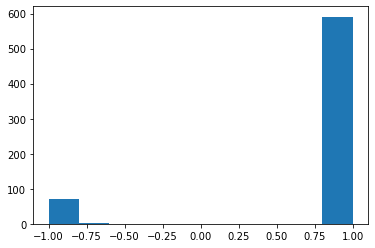

[Depth diff] abs_mean: 4.8879
[Depth error]
num of Car: 665
	num of depth 0-10: 0 
	num of depth 10-20: 68   abs_delta mean:3.051m, Out of 5m: 11
	num of depth 20-30: 142   abs_delta mean:3.759m, Out of 5m: 40
	num of depth 30-40: 259   abs_delta mean:4.236m, Out of 5m: 86
	num of depth 40-50: 95   abs_delta mean:6.680m, Out of 5m: 50
	num of depth 50-60: 50   abs_delta mean:8.237m, Out of 5m: 29
	num of depth 60+: 51     abs_delta mean:7.166m, Out of 5m: 29
[Total] mean:4.888, std:4.540


In [4]:
ELAN_eval_metrics('ELAN_video')
print()
print('||'*20)
print()
ELAN_eval_metrics('0720_BL')

## Eval result : improvement of objects

In [87]:
valset = [x.strip() for x in open('Elan_3d_box/ImageSets/val.txt').readlines()]
val_images = sorted(glob.glob('Elan_3d_box/image_2/*.png'))[-1*len(valset):] 
GT_labels = sorted(glob.glob('Elan_3d_box/renew_label/*.txt'))[-1*len(valset):]
video_labels = sorted(glob.glob('ELAN_video/*.txt'))[-1*len(valset):]
BL_labels = sorted(glob.glob('ELAN_BL/*.txt'))[-1*len(valset):]
assert len(valset) == len(video_labels), 'video_label length diff'
assert len(valset) == len(BL_labels), 'BL_label length diff'

GT_tracking_dict = tracking_obj_by_labels(GT_labels, val_images, WRITE_FILE=False)
video_tracking_dict = tracking_obj_by_labels(video_labels, val_images, WRITE_FILE=False)
BL_tracking_dict = tracking_obj_by_labels(BL_labels, val_images, WRITE_FILE=False)

0
500
0
500
0
500


In [88]:
other_count = 0
no_consist_count = 0
consist_count = 0
for key in video_tracking_dict.keys():
    GT_obj = gt_tracking_dict[key]
    video_obj = video_tracking_dict[key]
    BL_obj = BL_tracking_dict[key]
    if GT_obj.class_.lower() != 'car':
        other_count += 1
        continue
    if (video_obj.box2d != BL_obj.box2d).all() or (video_obj.box2d != GT_obj.box2d).all() or (GT_obj.box2d != BL_obj.box2d).all():
        print('Box 2D diff:', key)
        break
        
    if len(GT_obj.frames) == 1:
        no_consist_count += 1
        GT_dim = GT_obj.dims[0]
        video_dim = video_obj.dims[0]
        BL_dim = BL_obj.dims[0]
    else:
        GT_dim = np.mean(GT_obj.dims, axis=0)
        
        video_dim = np.mean(video_obj.dims, axis=0)
        BL_dim = np.mean(BL_obj.dims, axis=0)
        
        print(GT_dim)
        print(GT_obj.dims)
        for crop in GT_obj.crops:
            plt.imshow(crop)
            plt.show()
        print()
        print(video_dim)
        print(video_obj.dims)
        print()
        print(BL_dim)
        print(BL_obj.dims)
        print()
        break
            

[1.34  1.75  4.135]
[[1.34, 1.75, 4.21], [1.34, 1.75, 4.21], [1.34, 1.75, 4.21], [1.34, 1.75, 4.21], [1.34, 1.75, 4.21], [1.34, 1.75, 4.21], [1.34, 1.75, 3.91], [1.34, 1.75, 3.91]]

[1.54125 1.79125 3.63125]
[[1.39, 1.69, 3.16], [1.66, 1.87, 4.24], [1.47, 1.77, 3.22], [1.58, 1.82, 3.76], [1.54, 1.79, 3.68], [1.63, 1.85, 4.01], [1.46, 1.73, 3.16], [1.6, 1.81, 3.82]]

[1.45625 1.77625 3.475  ]
[[1.25, 1.68, 2.71], [1.72, 1.9, 4.57], [1.52, 1.85, 3.32], [1.53, 1.77, 3.46], [1.3, 1.7, 2.97], [1.5, 1.86, 4.27], [1.38, 1.74, 3.1], [1.45, 1.71, 3.4]]



In [79]:
print(gt_dim)
print(video_dim)
print(BL_dim)

[1.56, 2.0, 4.06]
[1.65, 1.85, 3.91]
[1.73, 1.89, 4.14]
